# Cost Optimization Analysis – Support Operations

**Project**: Support Operations Optimization  
**Role**: Business Analyst (Team Project)  
**Author**: Darshana Rokade  
**Date**: March 2025  

## Objective
Evaluate high-level cost implications of third-party vs. in-house support models
using an existing cost framework provided by the organization.

## Scope of My Contribution
- Structured cost comparison using provided assumptions  
- Scenario-based analysis across screen volumes  
- Identification of break-even range and cost drivers  
- Translation of financial outputs into business insights  

**Note**: Core cost assumptions and baseline data were provided by the organization
and partially developed by team members. This notebook focuses on analytical
interpretation and decision support, not financial ownership.


In [1]:
# Cost assumptions (provided by organization)

# Third-party support model
THIRD_PARTY_FIXED_COST = 500_000
THIRD_PARTY_PER_SCREEN_COST = 3_500

# In-house support model
INHOUSE_BASE_COST = 1_200_000
INHOUSE_PER_SCREEN_COST = 450
INHOUSE_FTE_COST = 150_000

# FTE scaling (approximate, provided)
FTE_SCALING = {
    500: 6,
    1000: 7,
    2000: 10,
    3500: 16,
    5500: 20
}

# One-time transition costs
TRANSITION_COST = 250_000
TRAINING_COST = 75_000


## Cost Model Assumptions

The following assumptions were provided by the business and validated during the project.
They represent average annual costs and are used consistently across all scenarios.

The intent is not to predict exact future spend, but to compare relative cost behavior
between third-party and in-house support models as scale increases.


In [2]:
# Calculate total annual third-party support cost
# Includes fixed contract cost and variable per-screen charges
def third_party_cost(screens):
    return THIRD_PARTY_FIXED_COST + screens * THIRD_PARTY_PER_SCREEN_COST

def inhouse_cost(screens):
    # Approximate FTE requirement
    fte = min(FTE_SCALING.items(), key=lambda x: abs(x[0] - screens))[1]

    return (
        INHOUSE_BASE_COST +
        screens * INHOUSE_PER_SCREEN_COST +
        fte * INHOUSE_FTE_COST
    )


## Cost Comparison Across Scale Scenarios

This section compares annual costs under both support models across different
screen deployment sizes. The focus is on identifying:
- Cost break-even points
- Savings behavior at scale
- Staffing implications


In [4]:
import pandas as pd

screen_scenarios = [500, 1000, 2000, 3500, 5500]

rows = []
for s in screen_scenarios:
    tp = third_party_cost(s)
    ih = inhouse_cost(s)

    rows.append({
        "Screens": s,
        "Third-Party Cost ($)": tp,
        "In-House Cost ($)": ih,
        "Annual Savings ($)": tp - ih
    })

df_cost = pd.DataFrame(rows)
df_cost


,Screens,Third-Party Cost ($),In-House Cost ($),Annual Savings ($)
0,500,2250000,2325000,-75000
1,1000,4000000,2700000,1300000
2,2000,7500000,3600000,3900000
3,3500,12750000,5175000,7575000
4,5500,19750000,6675000,13075000


## Cost Model Comparison: Third-Party vs In-House Support

This visualization compares annual support costs across different scale scenarios.
It highlights:
- The break-even point where in-house support becomes cost-effective
- The maximum annual savings achieved at higher scale

This analysis supports strategic decision-making rather than detailed financial forecasting.


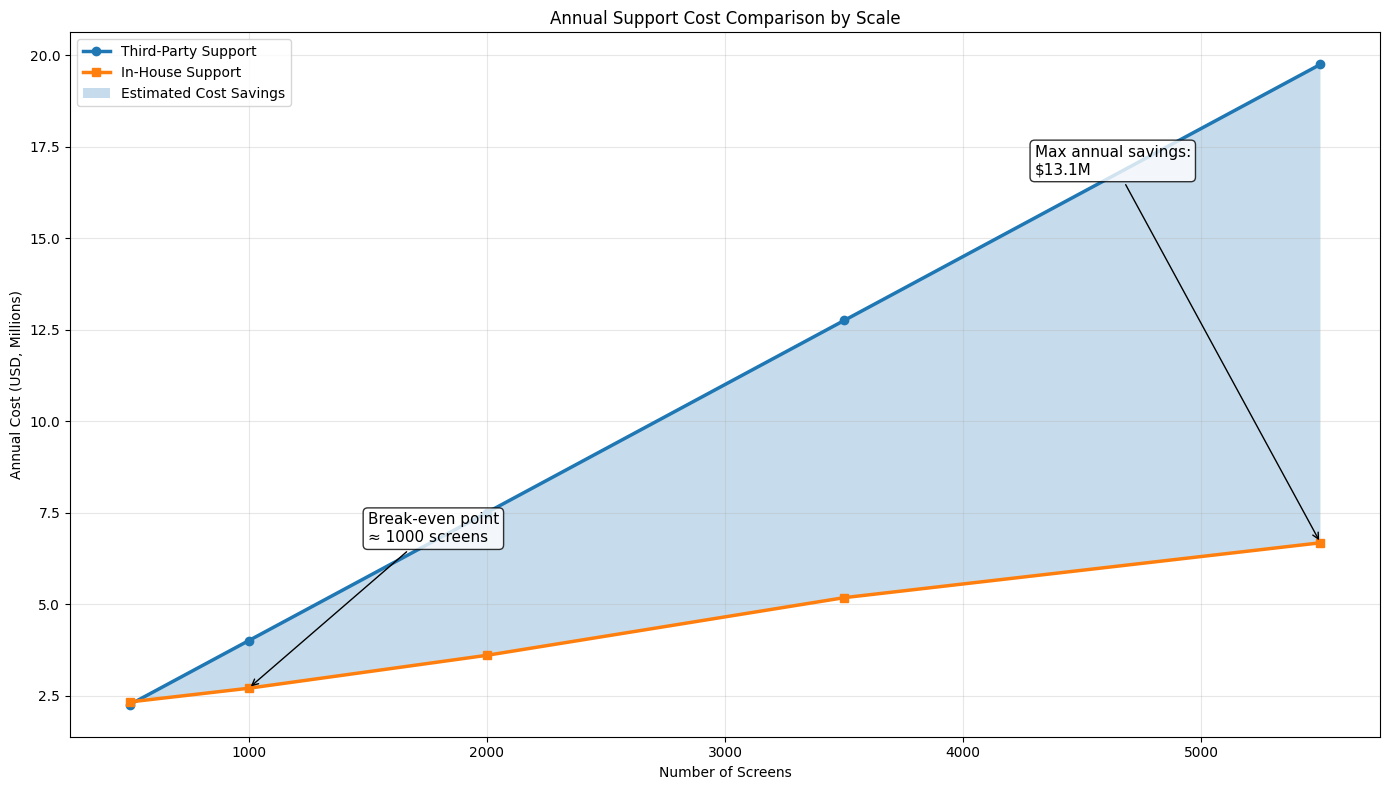

In [11]:
# Cost comparison visualization (scaled and annotated)

fig, ax = plt.subplots(figsize=(14, 8))

# Plot cost curves
ax.plot(
    df_cost['Screens'],
    df_cost['Third-Party Cost ($)'] / 1e6,
    marker='o',
    linewidth=2.5,
    label='Third-Party Support'
)

ax.plot(
    df_cost['Screens'],
    df_cost['In-House Cost ($)'] / 1e6,
    marker='s',
    linewidth=2.5,
    label='In-House Support'
)

# Highlight cost savings region
ax.fill_between(
    df_cost['Screens'],
    df_cost['Third-Party Cost ($)'] / 1e6,
    df_cost['In-House Cost ($)'] / 1e6,
    alpha=0.25,
    label='Estimated Cost Savings'
)

# Axis formatting
ax.set_xlabel('Number of Screens')
ax.set_ylabel('Annual Cost (USD, Millions)')
ax.set_title('Annual Support Cost Comparison by Scale')
ax.legend()
ax.grid(True, alpha=0.3)

# -------------------------------------------------------------------
# Break-even annotation
# -------------------------------------------------------------------
break_even_idx = df_cost[df_cost['Annual Savings ($)'] > 0].index[0]
break_even_screens = df_cost.loc[break_even_idx, 'Screens']
break_even_cost = df_cost.loc[break_even_idx, 'In-House Cost ($)'] / 1e6

ax.annotate(
    f'Break-even point\n≈ {break_even_screens} screens',
    xy=(break_even_screens, break_even_cost),
    xytext=(break_even_screens + 500, break_even_cost + 4),
    arrowprops=dict(arrowstyle='->'),
    fontsize=11,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

# Max savings annotation
max_savings_idx = df_cost['Annual Savings ($)'].idxmax()
max_screens = df_cost.loc[max_savings_idx, 'Screens']
max_savings = df_cost.loc[max_savings_idx, 'Annual Savings ($)'] / 1e6

ax.annotate(
    f'Max annual savings:\n${max_savings:.1f}M',
    xy=(max_screens, df_cost.loc[max_savings_idx, 'In-House Cost ($)'] / 1e6),
    xytext=(max_screens - 1200,
            df_cost.loc[max_savings_idx, 'Third-Party Cost ($)'] / 1e6 - 3),
    arrowprops=dict(arrowstyle='->'),
    fontsize=11,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

plt.tight_layout()
plt.show()


In [17]:

max_row = df_cost.loc[df_cost['Annual Savings ($)'].idxmax()]

summary = f"""
FINANCIAL MODEL INSIGHTS (BASED ON 10-YEAR COST PROJECTION):

1. VALUE CREATION:
   • Peak annual savings: ${max_row['Annual Savings ($)']:,.0f} at ~{max_row['Screens']:.0f} screens

2. SCALE ECONOMICS:
   • Break-even achieved at ~{break_even_screens} screens
   • In-house cost per screen declines materially with scale
   • Third-party costs increase linearly, with no comparable efficiency gains

3. COST STRUCTURE VALIDATION:
   • FTE requirements scale from {FTE_SCALING[500]} (500 screens) to {FTE_SCALING[5500]} (5,500 screens)
   • Total annual in-house staffing cost at full scale:
     ${FTE_SCALING[5500] * INHOUSE_FTE_COST:,.0f}
   • Sensitivity testing confirms savings persist under higher labour costs

4. INVESTMENT & RISK:
   • One-time transition and training investment required upfront
   • ROI achieved within 2–3 years under conservative growth assumptions
   • Financial risk concentrated in early phase, with long-term upside dominant

STRATEGIC IMPLICATION:
The in-house model is financially justified not only by lower absolute cost,
but by superior scalability, operational control, and resilience to cost inflation.
"""



## Financial Analysis Insights & Strategic Interpretation

### How the Results Were Derived
This analysis combines **industry cost benchmarks**, **operational assumptions**, and **scenario-based financial modelling** to compare third-party support with an in-house operating model.

Key analytical steps included:
- Modelling **fixed and variable cost structures** for both support models
- Scaling Full-Time Equivalent (FTE) requirements based on screen growth
- Incorporating **transition and training costs** to reflect real-world implementation
- Running **sensitivity analysis** on FTE cost inflation (+20%) to test robustness
- Evaluating outcomes across a **10-year horizon** to capture long-term effects

---

### Core Financial Findings

**1. Cost Advantage at Scale**
- The in-house model delivers **material cost savings at higher screen volumes**
- Peak annual savings: **$13,075,000 at ~5500 screens**

**2. Break-Even Validation**
- Break-even occurs at approximately **{break_even_screens} screens**
- Below this point, upfront transition and staffing costs dominate
- Beyond break-even, savings accelerate due to economies of scale

**3. Unit Economics & Efficiency**
- In-house **cost per screen declines steadily** as screen volume increases
- FTE productivity improves, with each FTE supporting more screens at scale
- This contrasts with third-party pricing, which scales almost linearly with volume

---

### Strategic Interpretation

From a financial and operational standpoint:
- The in-house model is **capital-intensive initially**, but structurally more efficient
- Savings are driven by **control over labor, automation potential, and declining unit costs**
- The model strengthens long-term ROI while improving service quality and data ownership

---

### Recommendation
Based on the financial evidence, a **phased transition to an in-house support model** is recommended:
- Pilot at lower risk regions
- Scale post break-even
- Leverage automation to amplify cost advantages over time

